In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# libraries for data wrangling
import pandas as pd
import numpy as np
# libraries for plotting
import matplotlib.pyplot as plt
%matplotlib inline  
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="whitegrid")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading longitudinal data
df_long = pd.read_csv('/content/drive/MyDrive/oasis_longitudinal.csv')

In [4]:
#first few entries of the dataset
df_long.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [5]:
#summary stats of numerical columns
df_long.describe(include=[np.number])

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [6]:
#summary of categorical columns
df_long.describe(include=[np.object])

,Subject ID,MRI ID,Group,M/F,Hand
count,373,373,373,373,373
unique,150,373,3,2,1
top,OAS2_0070,OAS2_0001_MR1,Nondemented,F,R
freq,5,1,190,213,373


In [7]:
# dropping irrelevant columns
df_long=df_long.drop(['Subject ID','MRI ID','Hand'],axis=1)

df_long.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [8]:
# checking missing values in each column
df_long.isna().sum()

Group        0
Visit        0
MR Delay     0
M/F          0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64

In [9]:
#check the percentage of missing values in each column
round(df_long.isnull().sum()/len(df_long.index), 2)*100

Group       0.0
Visit       0.0
MR Delay    0.0
M/F         0.0
Age         0.0
EDUC        0.0
SES         5.0
MMSE        1.0
CDR         0.0
eTIV        0.0
nWBV        0.0
ASF         0.0
dtype: float64

# **UNIVARIATE ANALYSIS**

In [10]:
# Plotting distribution of SES
def univariate_mul(var):
    fig = plt.figure(figsize=(16,12))
    cmap=plt.cm.Blues
    cmap1=plt.cm.coolwarm_r
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(212)
    df_long[var].plot(kind='hist',ax=ax1, grid=True)
    ax1.set_title('Histogram of '+var, fontsize=14)
    
    ax2=sns.distplot(df_long[[var]],hist=False)
    ax2.set_title('Distribution of '+ var)
    plt.show()

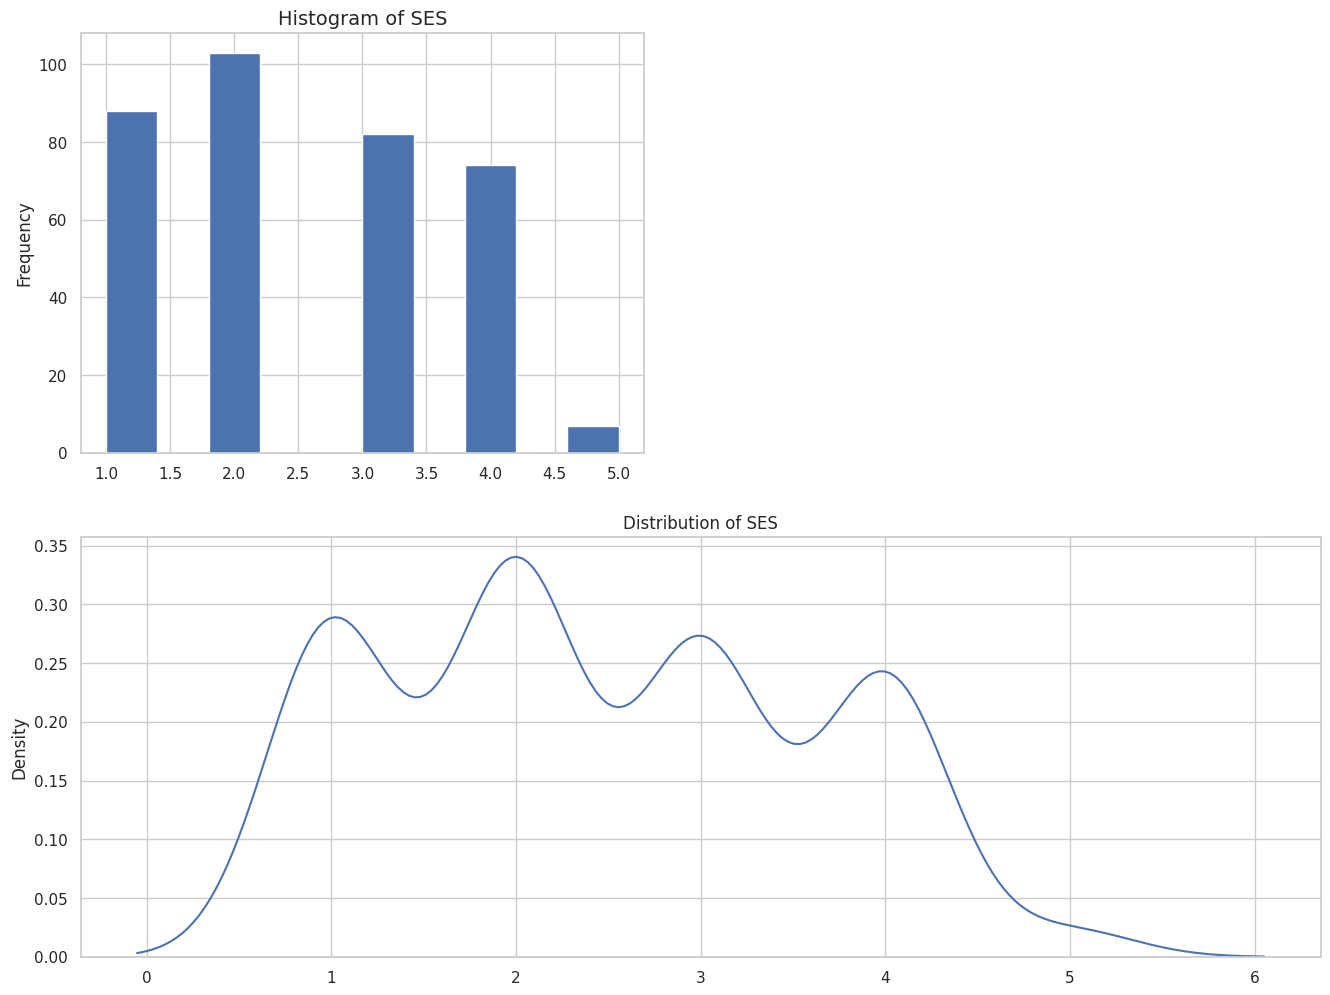

count    354.000000
mean       2.460452
std        1.134005
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: SES, dtype: float64

In [11]:
# lets see the distribution of SES to decide which value we can impute in place of missing values.
univariate_mul('SES')
df_long['SES'].describe()

In [12]:
# imputing missing value in SES with median
df_long['SES'].fillna((df_long['SES'].median()), inplace=True)

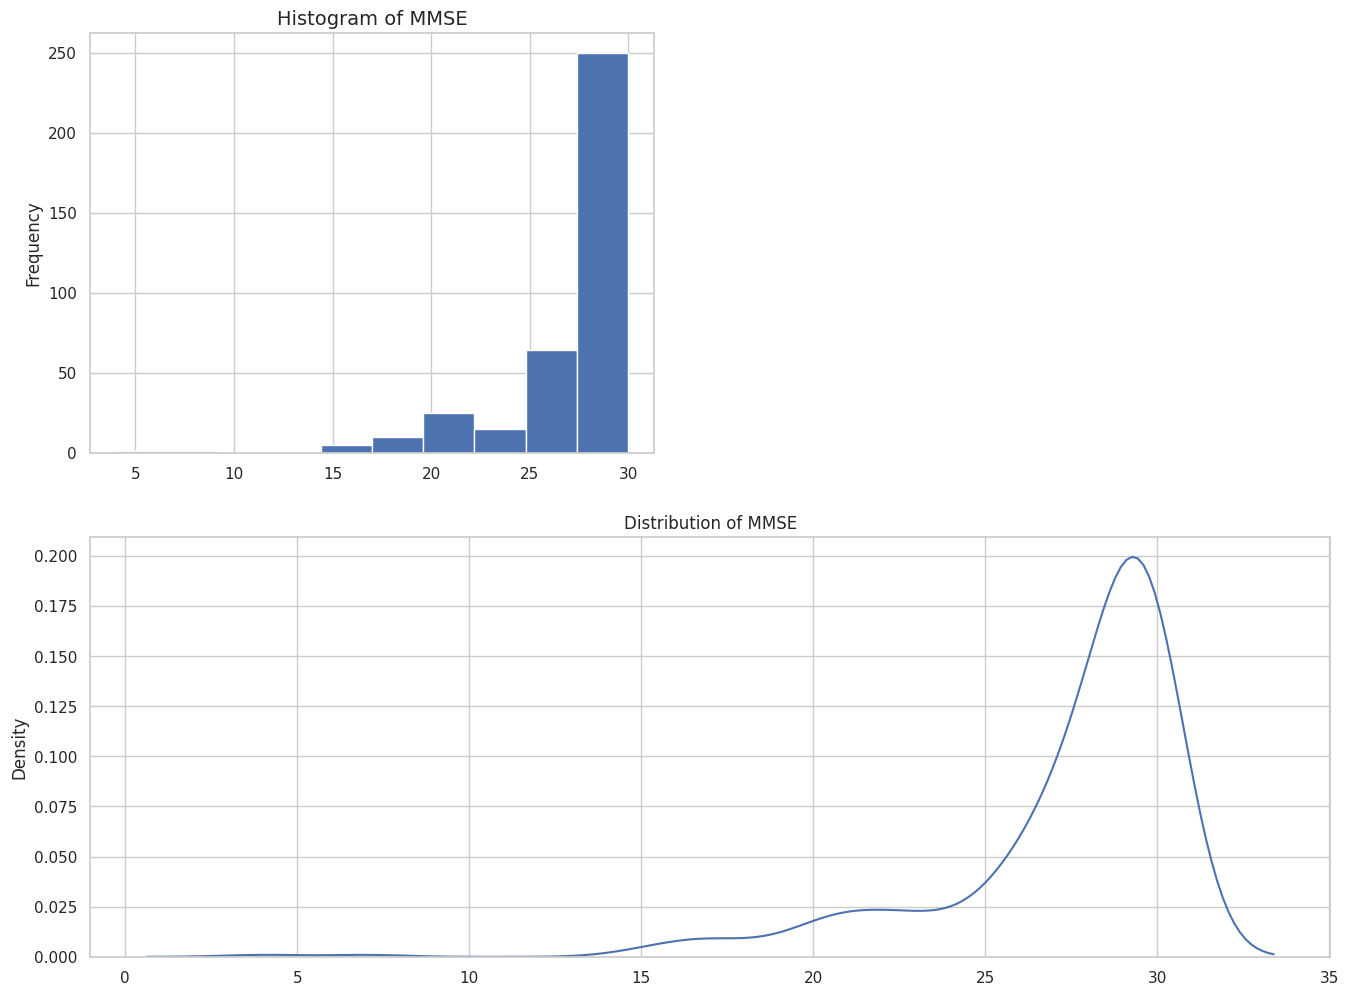

count    371.000000
mean      27.342318
std        3.683244
min        4.000000
25%       27.000000
50%       29.000000
75%       30.000000
max       30.000000
Name: MMSE, dtype: float64

In [13]:
univariate_mul('MMSE')
df_long['MMSE'].describe()

In [14]:
# imputing MMSE with median values
df_long['MMSE'].fillna((df_long['MMSE'].median()), inplace=True)

In [15]:
# Now, lets check the percentage of missing values in each column
round(df_long.isnull().sum()/len(df_long.index), 2)*100

Group       0.0
Visit       0.0
MR Delay    0.0
M/F         0.0
Age         0.0
EDUC        0.0
SES         0.0
MMSE        0.0
CDR         0.0
eTIV        0.0
nWBV        0.0
ASF         0.0
dtype: float64

In [16]:
# Defining function to create pie chart and bar plot as subplots
def plot_piechart(var):
  plt.figure(figsize=(14,7))
  plt.subplot(121)
  label_list = df_long[var].unique().tolist()
  df_long[var].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=label_list,
  wedgeprops={"linewidth":2,"edgecolor":"k"},shadow =True)
  plt.title("Distribution of "+ var +"  variable")

  plt.subplot(122)
  ax = df_long[var].value_counts().plot(kind="barh")

  for i,j in enumerate(df_long[var].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

  plt.title("Count of "+ var +" cases")
  plt.show()

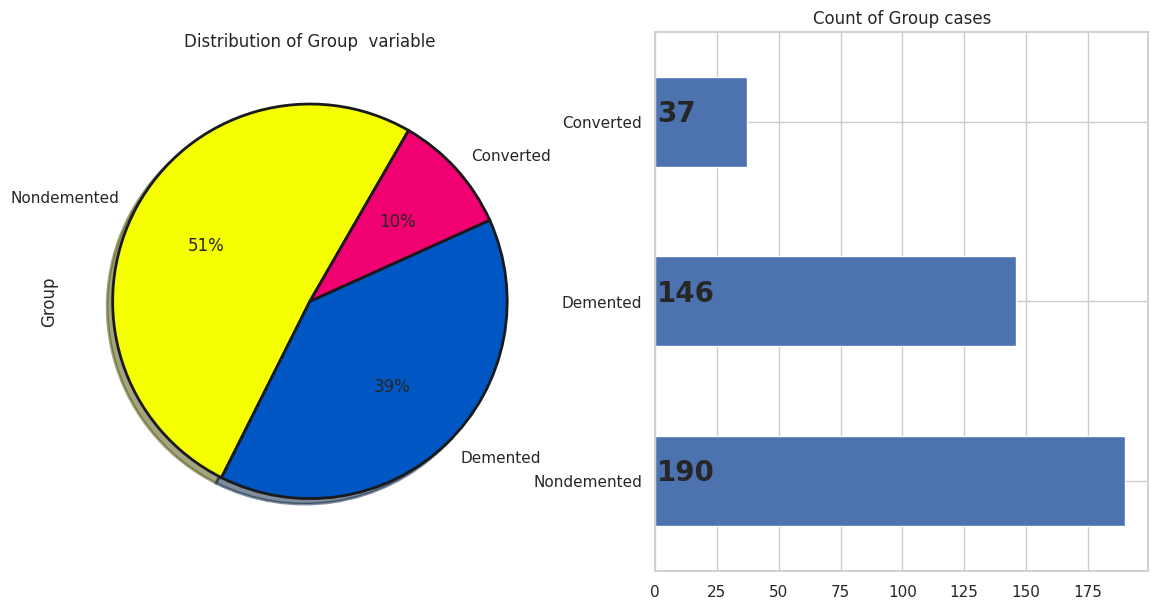

In [17]:
plot_piechart('Group')

In [18]:
df_long['CDR'].describe()

count    373.000000
mean       0.290885
std        0.374557
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max        2.000000
Name: CDR, dtype: float64

In [19]:
# Plotting CDR with other variable
def univariate_percent_plot(cat):
    fig = plt.figure(figsize=(18,12))
    cmap=plt.cm.Blues
    cmap1=plt.cm.coolwarm_r
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    
    result = df_long.groupby(cat).apply (lambda group: (group.CDR == 'Normal').sum() / float(group.CDR.count())
         ).to_frame('Normal')
    result['Dementia'] = 1 -result.Normal
    result.plot(kind='bar', stacked = True,colormap=cmap1, ax=ax1, grid=True)
    ax1.set_title('stacked Bar Plot of '+ cat +' (in %)', fontsize=14)
    ax1.set_ylabel('% Dementia status (Normal vs Dementia)')
    ax1.legend(loc="lower right")
    group_by_stat = df_long.groupby([cat, 'CDR']).size()
    group_by_stat.unstack().plot(kind='bar', stacked=True,ax=ax2,grid=True)
    ax2.set_title('stacked Bar Plot of '+ cat +' (in %)', fontsize=14)
    ax2.set_ylabel('Number of Cases')
    plt.show()

# Categorizing feature CDR
def cat_CDR(n):
    if n == 0:
        return 'Normal'
    
    else:                                         # As we have no cases of sever dementia CDR score=3
        return 'Dementia'

df_long['CDR'] = df_long['CDR'].apply(lambda x: cat_CDR(x))


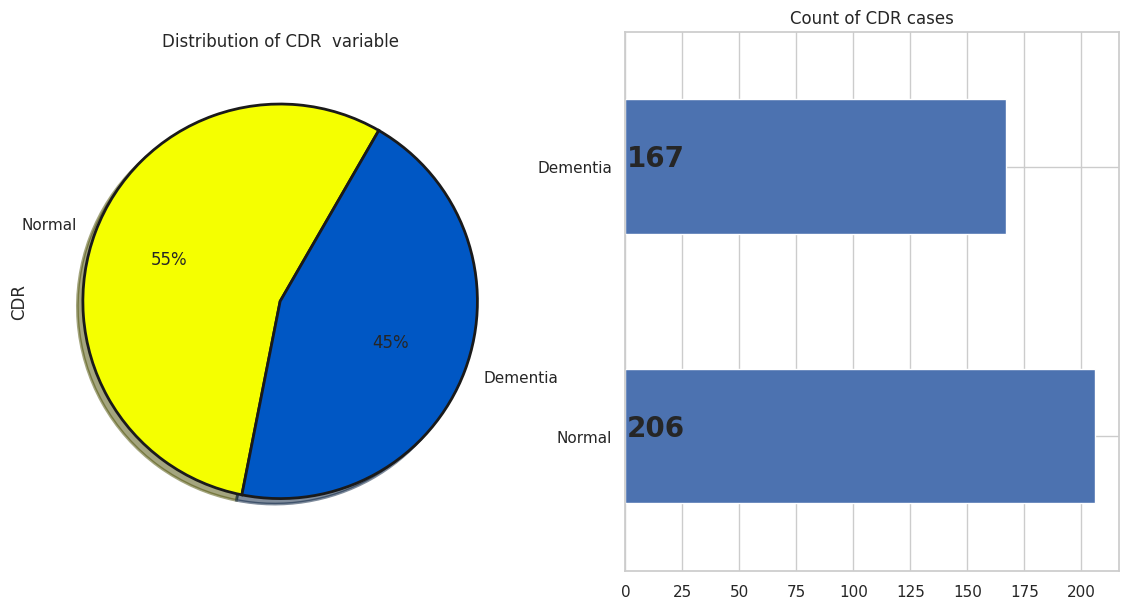

In [20]:
plot_piechart('CDR')

In [21]:
df_long['MMSE'].describe()

count    373.000000
mean      27.351206
std        3.675329
min        4.000000
25%       27.000000
50%       29.000000
75%       30.000000
max       30.000000
Name: MMSE, dtype: float64

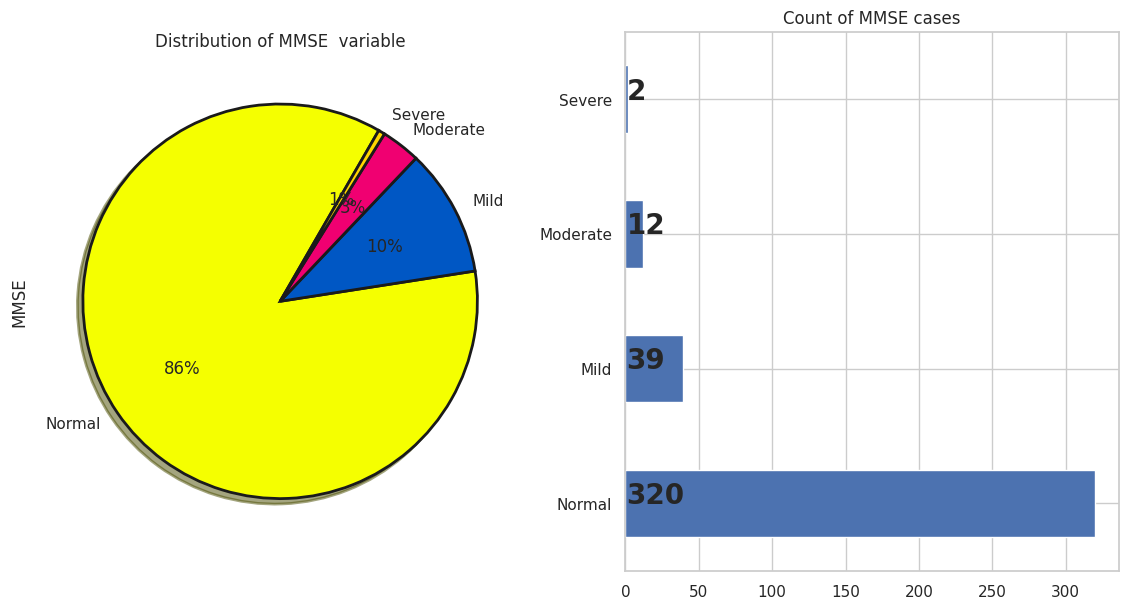

In [22]:
# Categorizing feature MMSE
def cat_MMSE(n):
    if n >= 24:
        return 'Normal'
    elif n <= 9:
        return 'Severe'
    elif n >= 10 and n <= 18:
        return 'Moderate'
    elif n >= 19 and n <= 23:                                        # As we have no cases of sever dementia CDR score=3
        return 'Mild'

df_long['MMSE'] = df_long['MMSE'].apply(lambda x: cat_MMSE(x))
plot_piechart('MMSE')

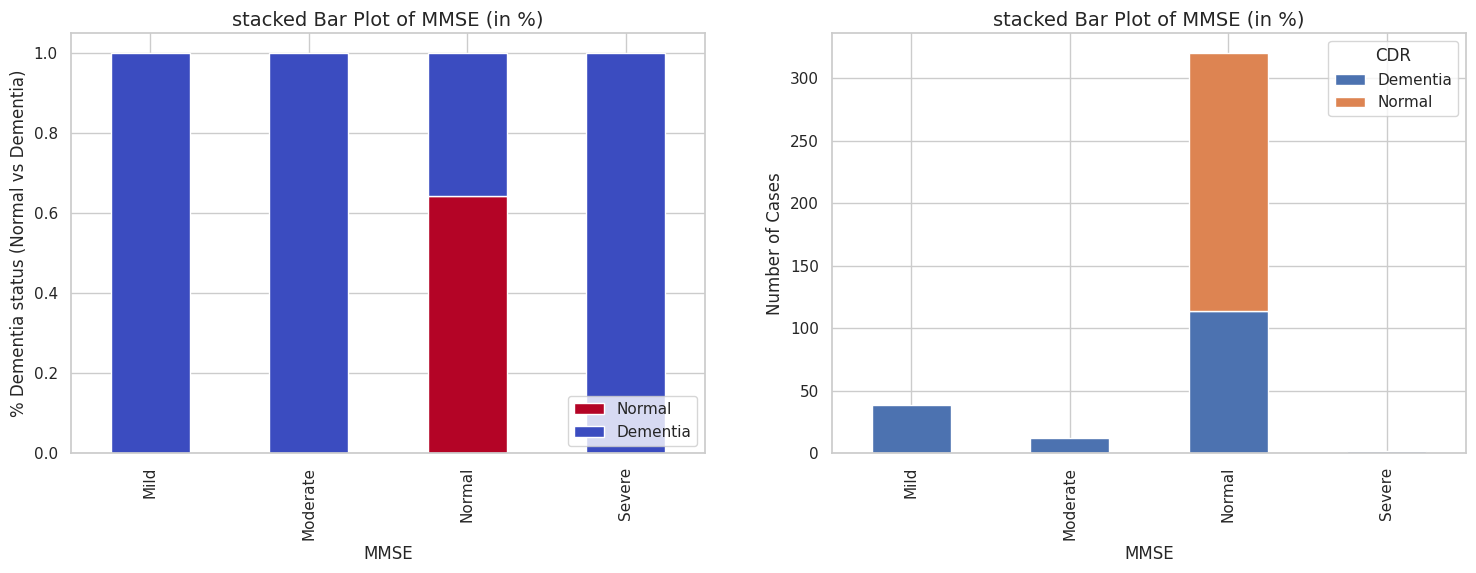

In [23]:
univariate_percent_plot('MMSE')

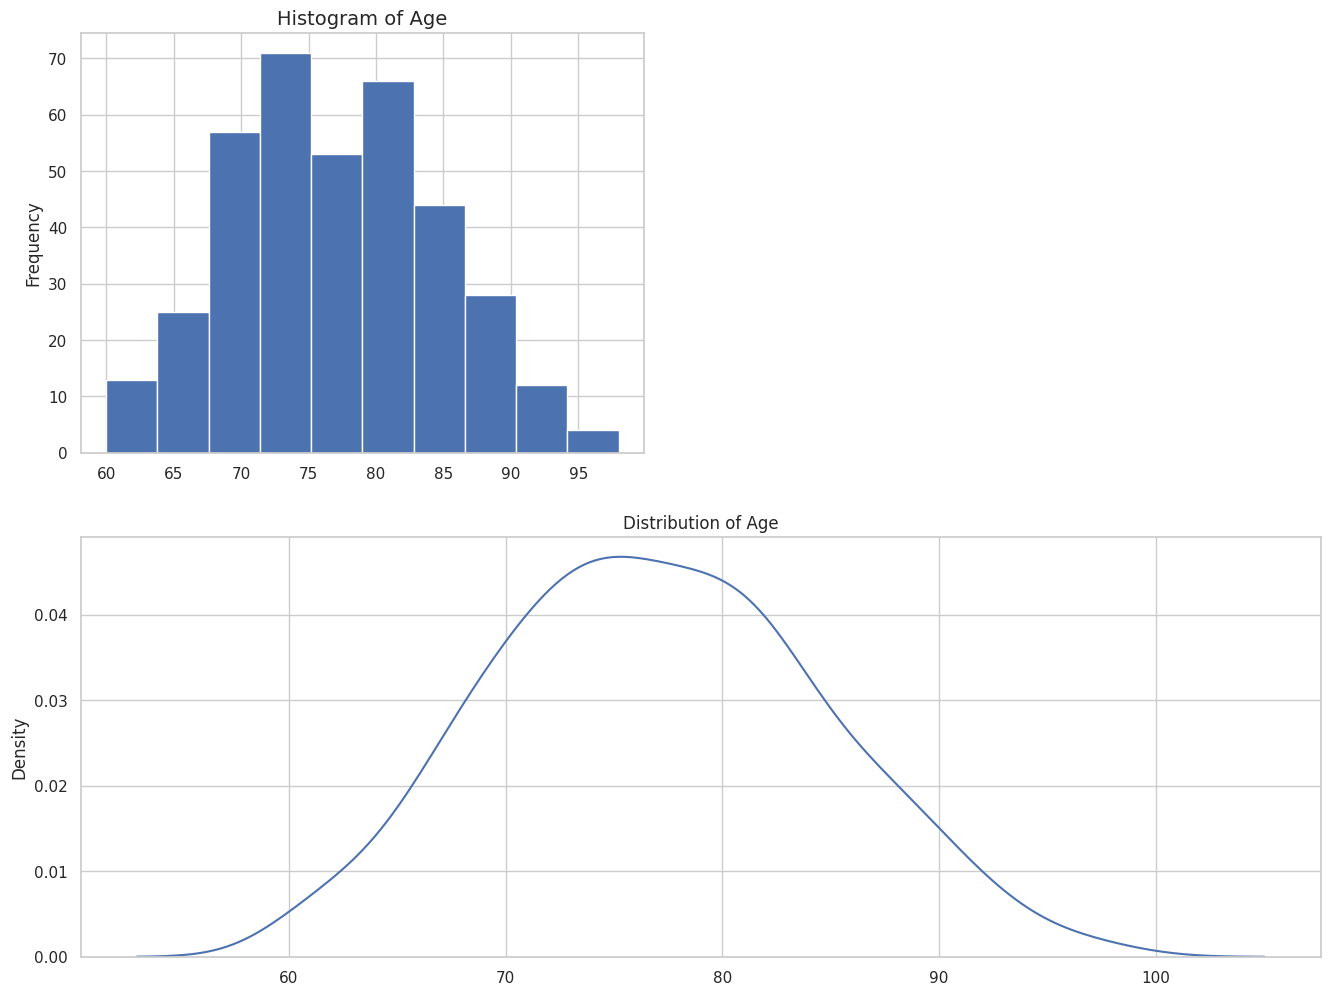

count    373.000000
mean      77.013405
std        7.640957
min       60.000000
25%       71.000000
50%       77.000000
75%       82.000000
max       98.000000
Name: Age, dtype: float64

In [24]:
univariate_mul('Age')
df_long['Age'].describe()

In [25]:
df_long['age_group'] = pd.cut(df_long['Age'], [60, 70, 80,90, 100], labels=['60-70', '70-80', '80-90','90-100'])
df_long['age_group'].value_counts()

70-80     173
80-90     107
60-70      75
90-100     16
Name: age_group, dtype: int64

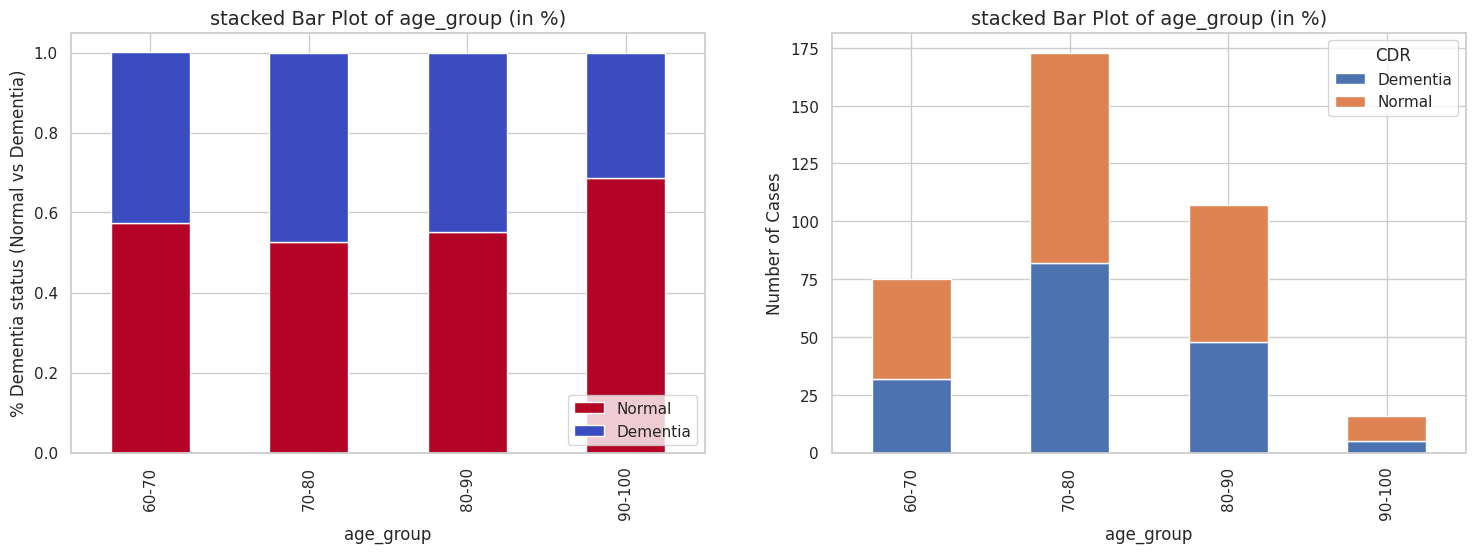

In [26]:
# Now plotting age group to see dementia distribution
univariate_percent_plot('age_group')

# **BIVARIATE ANALYSIS**

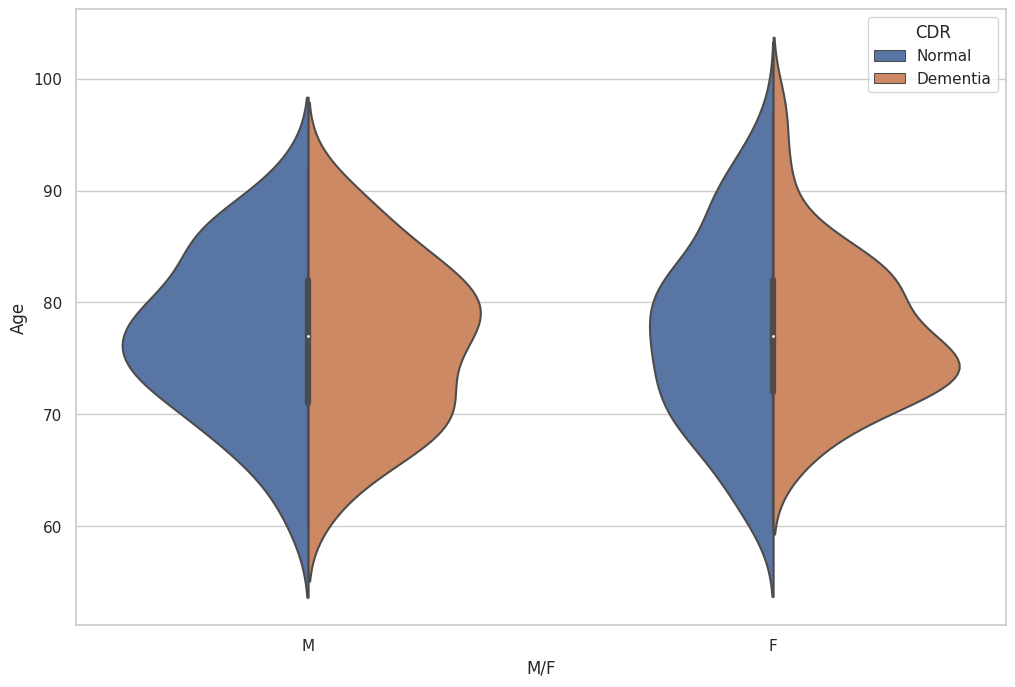

In [27]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="Age",hue="CDR",split=True, data=df_long)
plt.show()

In [28]:
df_long['eTIV'].describe()

count     373.000000
mean     1488.128686
std       176.139286
min      1106.000000
25%      1357.000000
50%      1470.000000
75%      1597.000000
max      2004.000000
Name: eTIV, dtype: float64

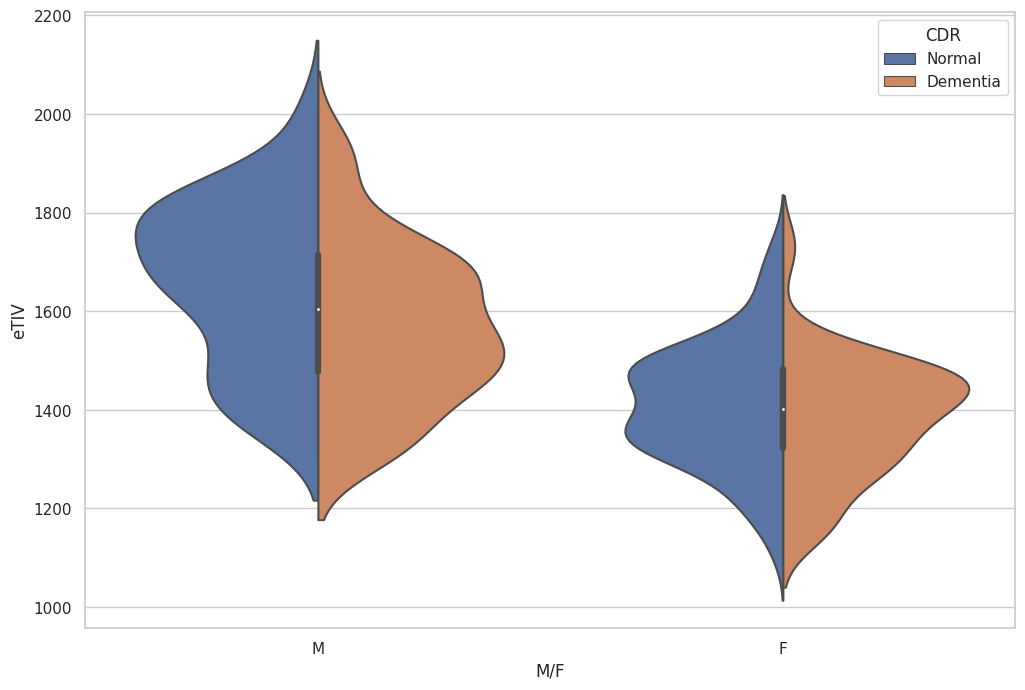

In [29]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="eTIV",hue="CDR",split=True, data=df_long)
plt.show()


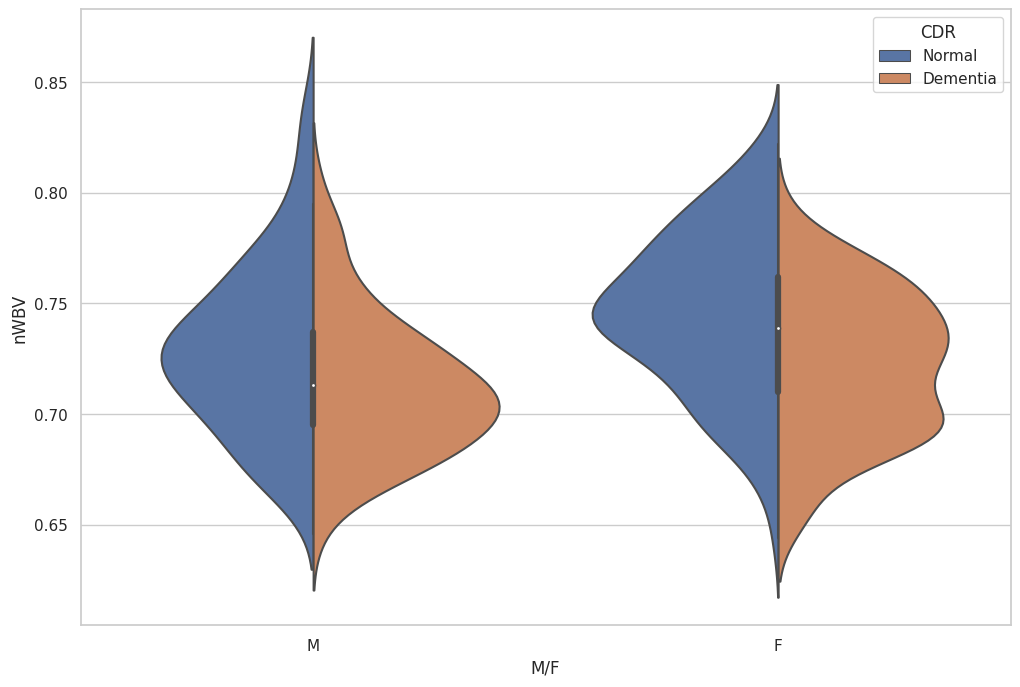

In [30]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="nWBV",hue="CDR",split=True, data=df_long)
plt.show()

In [31]:
df_long['EDUC'].describe()

count    373.000000
mean      14.597855
std        2.876339
min        6.000000
25%       12.000000
50%       15.000000
75%       16.000000
max       23.000000
Name: EDUC, dtype: float64

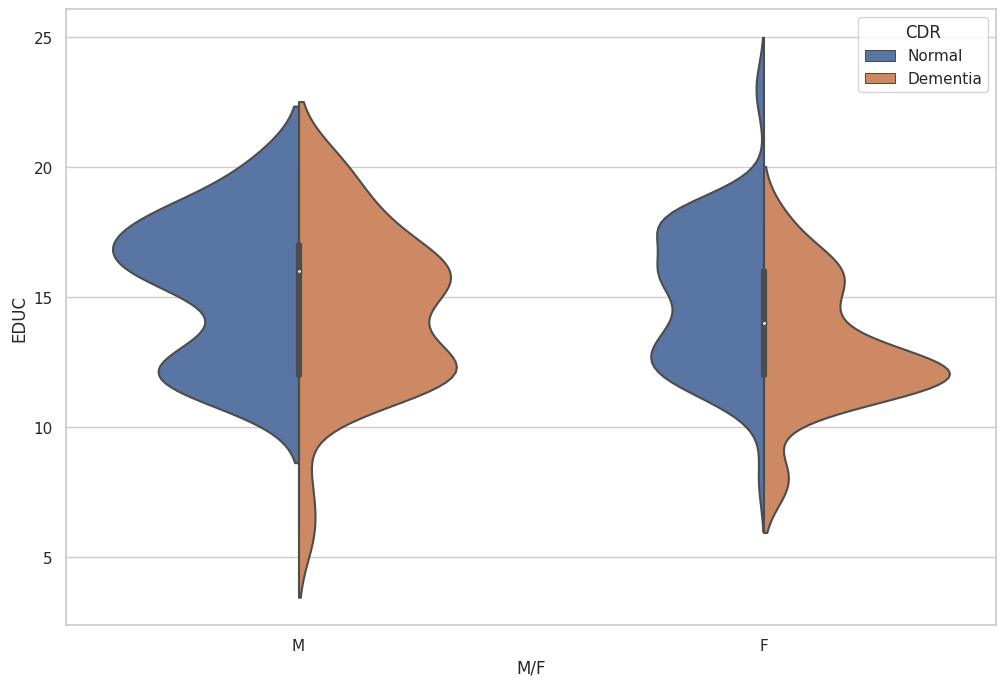

In [32]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="EDUC",hue="CDR",split=True, data=df_long)
plt.show()

In [33]:
df_long['SES'].describe()

count    373.000000
mean       2.436997
std        1.109307
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: SES, dtype: float64

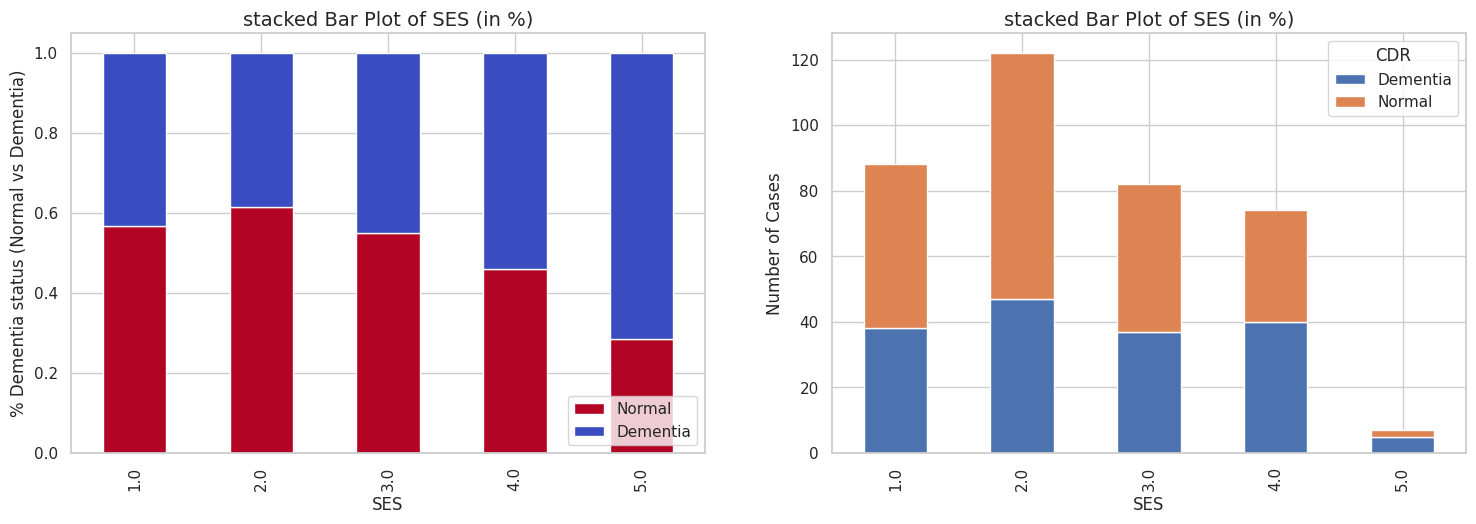

In [34]:
# Now plotting socio economic status to see dementia distribution
univariate_percent_plot('SES')

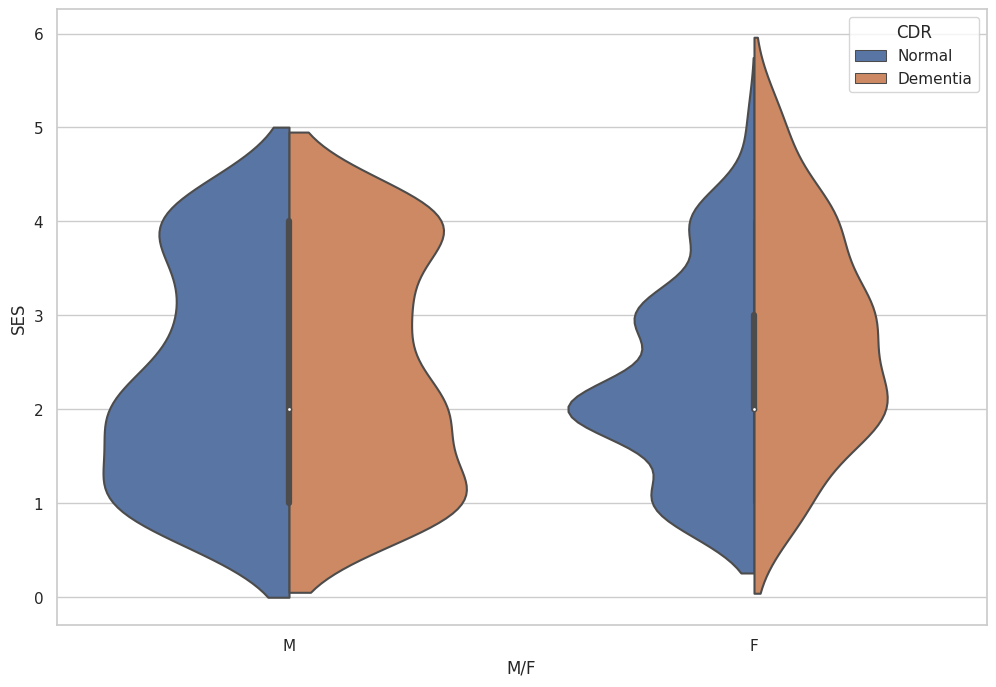

In [35]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="SES",hue="CDR",split=True, data=df_long)
plt.show()

In [36]:
df_long['ASF'].describe()

count    373.000000
mean       1.195461
std        0.138092
min        0.876000
25%        1.099000
50%        1.194000
75%        1.293000
max        1.587000
Name: ASF, dtype: float64

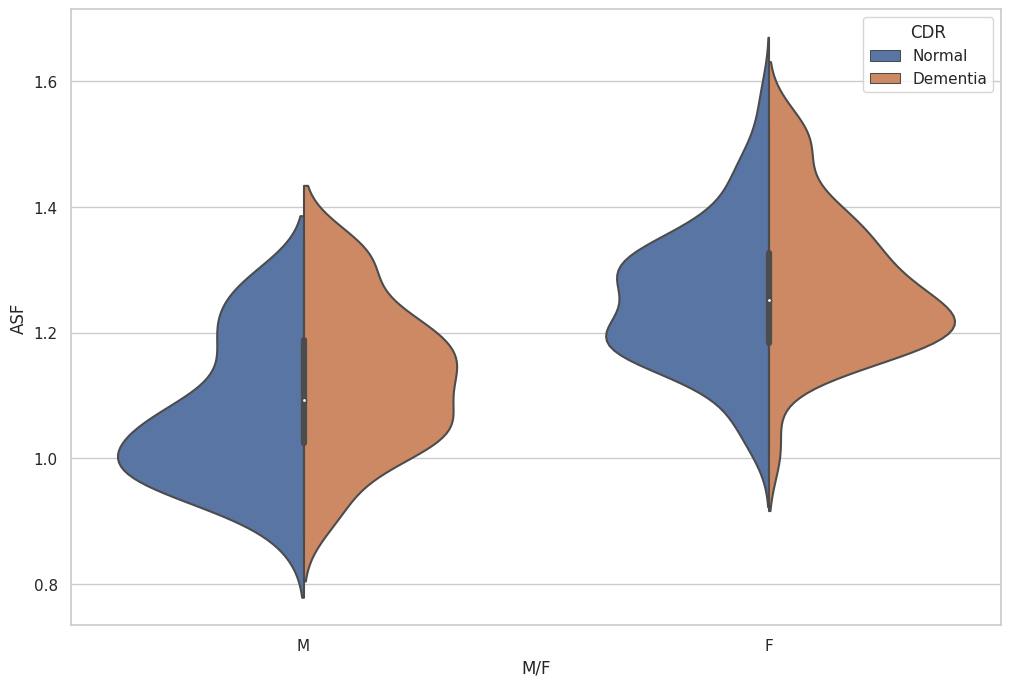

In [37]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="M/F", y="ASF",hue="CDR",split=True, data=df_long)
plt.show()

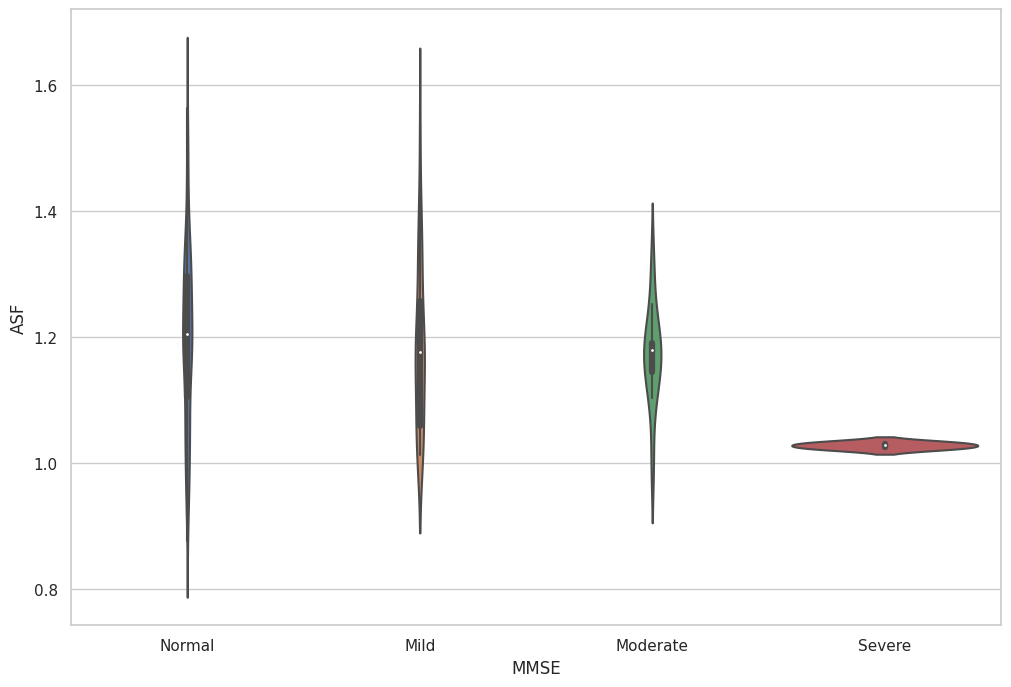

In [38]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="MMSE", y="ASF",split=True, data=df_long)
plt.show()

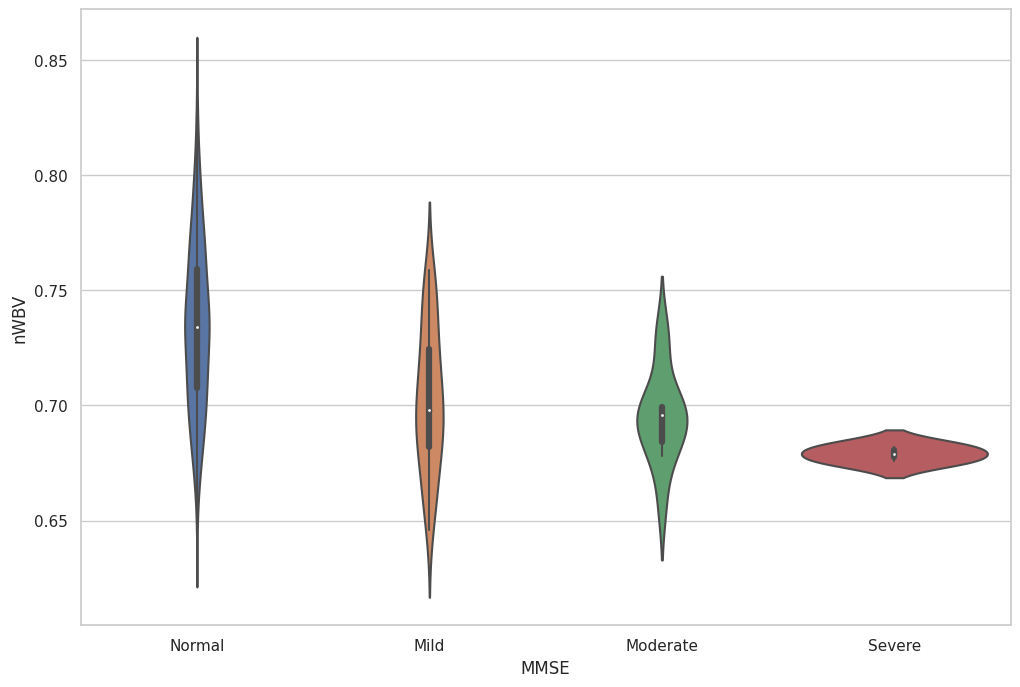

In [39]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="MMSE", y="nWBV",split=True, data=df_long)
plt.show()

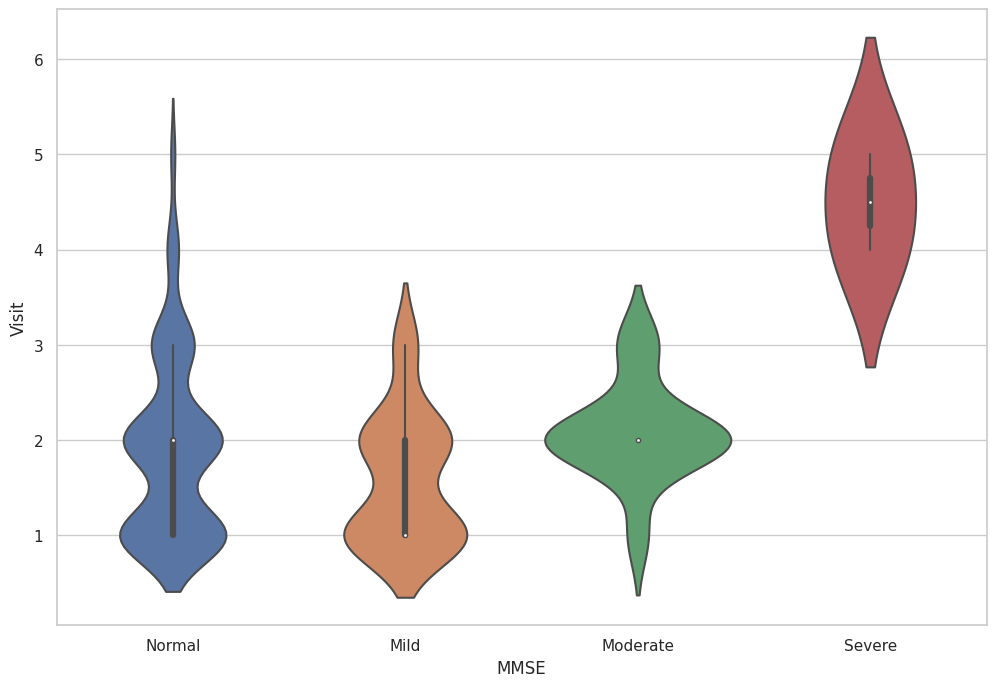

In [40]:
plt.figure(figsize=(12, 8))
ax = sns.violinplot(x="MMSE", y="Visit",split=True, data=df_long)
plt.show()

### **MULTICOLLINEARITY**

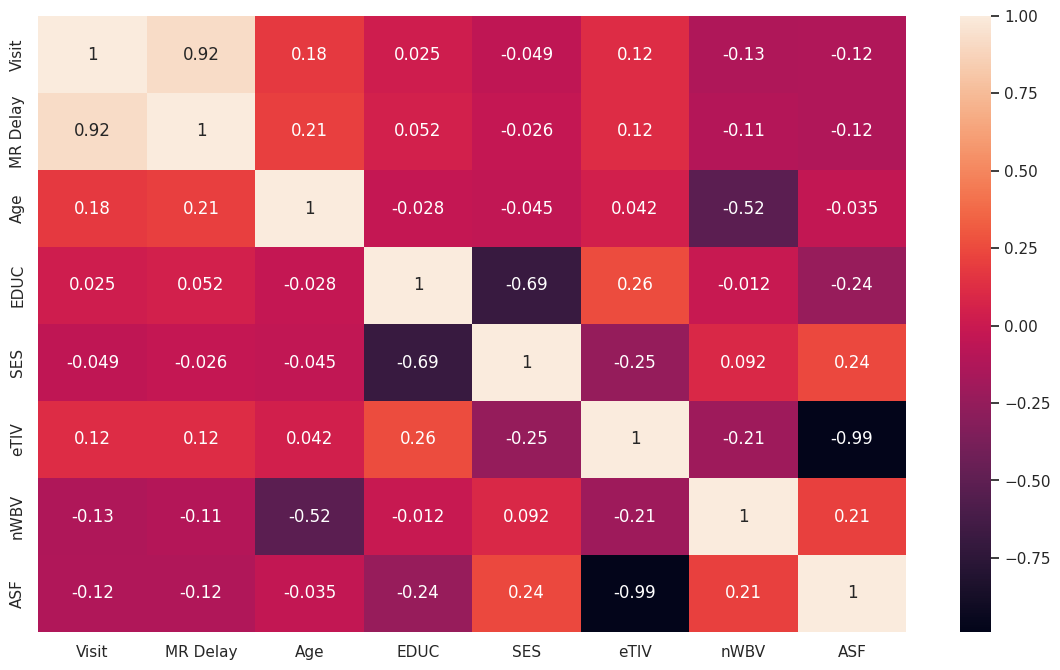

In [41]:
plt.figure(figsize=(14, 8))
sns.heatmap(df_long.corr(), annot=True)
plt.show()


# **FITTING THE MODEL**

In [42]:
!pip install mrmr_selection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 7.4 MB/s eta 0:00:00


In [43]:
df_long.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,age_group
0,Nondemented,1,0,M,87,14,2.0,Normal,Normal,1987,0.696,0.883,80-90
1,Nondemented,2,457,M,88,14,2.0,Normal,Normal,2004,0.681,0.876,80-90
2,Demented,1,0,M,75,12,2.0,Mild,Dementia,1678,0.736,1.046,70-80
3,Demented,2,560,M,76,12,2.0,Normal,Dementia,1738,0.713,1.010,70-80
4,Demented,3,1895,M,80,12,2.0,Mild,Dementia,1698,0.701,1.034,70-80


In [44]:
df_long.value_counts('age_group')

age_group
70-80     173
80-90     107
60-70      75
90-100     16
dtype: int64

In [45]:
df_long.replace(('M','F'),(0,1),inplace=True)
df_long.replace(('Normal','Mild','Moderate','Severe'),(0,1,2,3),inplace=True)
df_long.replace(('60-70','70-80','80-90','90-100'),(0,1,2,3),inplace=True)
df_long.replace(('Nondemented','Demented','Converted'),(0,1,2),inplace=True)
df_long.replace(('Normal','Dementia'),(0,1),inplace=True)
df_long.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,age_group
0,0,1,0,0,87,14,2.0,0,0,1987,0.696,0.883,2
1,0,2,457,0,88,14,2.0,0,0,2004,0.681,0.876,2
2,1,1,0,0,75,12,2.0,1,1,1678,0.736,1.046,1
3,1,2,560,0,76,12,2.0,0,1,1738,0.713,1.010,1
4,1,3,1895,0,80,12,2.0,1,1,1698,0.701,1.034,1


In [46]:
y=df_long['Group']
y = np.nan_to_num(y)
X=df_long[df_long.columns.drop('Group')]

### **BEFORE FEATURE EXTRACTION**

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [49]:
model = Sequential()
model.add(Dense(15, input_dim=12, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(786, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                195       
                                                                 
 dense_1 (Dense)             (None, 512)               8192      
                                                                 
 dense_2 (Dense)             (None, 786)               403218    
                                                                 
 dense_3 (Dense)             (None, 7)                 5509      
                                                                 
Total params: 417,114
Trainable params: 417,114
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
8/8 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.4418
Epoch 2/10
8/8 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5221
Epoch 3/10
8/8 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5221
Epoch 4/10
8/8 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5221
Epoch 5/10
8/8 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.5221
Epoch 6/10
8/8 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.5221
Epoch 7/10
8/8 [==============================] - 0s 15ms/step - loss: nan - accuracy: 0.5221
Epoch 8/10
8/8 [==============================] - 0s 14ms/step - loss: nan - accuracy: 0.5221
Epoch 9/10
8/8 [==============================] - 0s 15ms/step - loss: nan - accuracy: 0.5221
Epoch 10/10
8/8 [==============================] - 0s 15ms/step - loss: nan - accuracy: 0.5221


###**FEATURE EXTRACTION AT 11 FEATURES**

In [52]:
from mrmr import mrmr_classif
selected_features11 = mrmr_classif(X=X, y=y, K=11)

100%|██████████| 11/11 [00:00<00:00, 36.28it/s]


In [53]:
print(selected_features11)

['CDR', 'Age', 'MMSE', 'SES', 'M/F', 'MR Delay', 'nWBV', 'EDUC', 'Visit', 'eTIV', 'ASF']


In [54]:
X11=X[selected_features11]
X11 = np.nan_to_num(X11)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X11, y, test_size=0.33, random_state=42)
model11 = Sequential()
model11.add(Dense(15, input_dim=11, activation='relu'))
model11.add(Dense(512, activation='relu'))
model11.add(Dense(786, activation='relu'))
model11.add(Dense(7, activation='softmax'))
model11.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 15)                180       
                                                                 
 dense_5 (Dense)             (None, 512)               8192      
                                                                 
 dense_6 (Dense)             (None, 786)               403218    
                                                                 
 dense_7 (Dense)             (None, 7)                 5509      
                                                                 
Total params: 417,099
Trainable params: 417,099
Non-trainable params: 0
_________________________________________________________________


In [56]:
model11.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
8/8 [==============================] - 1s 9ms/step - loss: 58.1908 - accuracy: 0.3494
Epoch 2/10
8/8 [==============================] - 0s 11ms/step - loss: 37.0169 - accuracy: 0.4859
Epoch 3/10
8/8 [==============================] - 0s 9ms/step - loss: 32.4669 - accuracy: 0.4618
Epoch 4/10
8/8 [==============================] - 0s 10ms/step - loss: 19.1620 - accuracy: 0.4257
Epoch 5/10
8/8 [==============================] - 0s 9ms/step - loss: 19.3961 - accuracy: 0.4779
Epoch 6/10
8/8 [==============================] - 0s 9ms/step - loss: 25.8167 - accuracy: 0.4699
Epoch 7/10
8/8 [==============================] - 0s 9ms/step - loss: 15.8165 - accuracy: 0.4819
Epoch 8/10
8/8 [==============================] - 0s 9ms/step - loss: 9.2816 - accuracy: 0.4418
Epoch 9/10
8/8 [==============================] - 0s 11ms/step - loss: 7.7869 - accuracy: 0.4538
Epoch 10/10
8/8 [==============================] - 0s 9ms/step - loss: 7.5277 - accuracy: 0.4337


###**FEATURE EXTRACTION AT 10 FEATURES**

In [57]:
from mrmr import mrmr_classif
selected_features10 = mrmr_classif(X=X, y=y, K=10)

100%|██████████| 10/10 [00:00<00:00, 67.59it/s]


In [58]:
print(selected_features10)

['CDR', 'Age', 'MMSE', 'SES', 'M/F', 'MR Delay', 'nWBV', 'EDUC', 'Visit', 'eTIV']


In [59]:
X10=X[selected_features10]
X10 = np.nan_to_num(X10)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X10, y, test_size=0.33, random_state=42)
model10 = Sequential()
model10.add(Dense(15, input_dim=10, activation='relu'))
model10.add(Dense(512, activation='relu'))
model10.add(Dense(786, activation='relu'))
model10.add(Dense(7, activation='softmax'))
model10.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model10.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 15)                165       
                                                                 
 dense_9 (Dense)             (None, 512)               8192      
                                                                 
 dense_10 (Dense)            (None, 786)               403218    
                                                                 
 dense_11 (Dense)            (None, 7)                 5509      
                                                                 
Total params: 417,084
Trainable params: 417,084
Non-trainable params: 0
_________________________________________________________________


In [61]:
model10.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
8/8 [==============================] - 1s 9ms/step - loss: 29.2428 - accuracy: 0.3454
Epoch 2/10
8/8 [==============================] - 0s 10ms/step - loss: 29.3037 - accuracy: 0.4257
Epoch 3/10
8/8 [==============================] - 0s 10ms/step - loss: 20.5558 - accuracy: 0.4699
Epoch 4/10
8/8 [==============================] - 0s 9ms/step - loss: 26.6946 - accuracy: 0.3614
Epoch 5/10
8/8 [==============================] - 0s 9ms/step - loss: 24.2109 - accuracy: 0.4819
Epoch 6/10
8/8 [==============================] - 0s 13ms/step - loss: 21.2009 - accuracy: 0.3936
Epoch 7/10
8/8 [==============================] - 0s 9ms/step - loss: 15.2304 - accuracy: 0.4578
Epoch 8/10
8/8 [==============================] - 0s 9ms/step - loss: 15.7037 - accuracy: 0.4578
Epoch 9/10
8/8 [==============================] - 0s 11ms/step - loss: 18.2403 - accuracy: 0.4257
Epoch 10/10
8/8 [==============================] - 0s 9ms/step - loss: 11.3985 - accuracy: 0.4458


###**FEATURE EXTRACTION AT 9 FEATURES**

In [62]:
from mrmr import mrmr_classif
selected_features9 = mrmr_classif(X=X, y=y, K=9)

100%|██████████| 9/9 [00:00<00:00, 61.80it/s]


In [63]:
print(selected_features9)

['CDR', 'Age', 'MMSE', 'SES', 'M/F', 'MR Delay', 'nWBV', 'EDUC', 'Visit']


In [64]:
X9=X[selected_features9]
X9 = np.nan_to_num(X9)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X9, y, test_size=0.33, random_state=42)
model9 = Sequential()
model9.add(Dense(15, input_dim=9, activation='relu'))
model9.add(Dense(512, activation='relu'))
model9.add(Dense(786, activation='relu'))
model9.add(Dense(7, activation='softmax'))
model9.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model9.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 15)                150       
                                                                 
 dense_13 (Dense)            (None, 512)               8192      
                                                                 
 dense_14 (Dense)            (None, 786)               403218    
                                                                 
 dense_15 (Dense)            (None, 7)                 5509      
                                                                 
Total params: 417,069
Trainable params: 417,069
Non-trainable params: 0
_________________________________________________________________


In [66]:
model9.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
8/8 [==============================] - 1s 9ms/step - loss: 20.5781 - accuracy: 0.3454
Epoch 2/10
8/8 [==============================] - 0s 8ms/step - loss: 16.5827 - accuracy: 0.4257
Epoch 3/10
8/8 [==============================] - 0s 9ms/step - loss: 21.9554 - accuracy: 0.5141
Epoch 4/10
8/8 [==============================] - 0s 10ms/step - loss: 10.4840 - accuracy: 0.4337
Epoch 5/10
8/8 [==============================] - 0s 9ms/step - loss: 3.4138 - accuracy: 0.5301
Epoch 6/10
8/8 [==============================] - 0s 9ms/step - loss: 6.9058 - accuracy: 0.4900
Epoch 7/10
8/8 [==============================] - 0s 9ms/step - loss: 4.9495 - accuracy: 0.4659
Epoch 8/10
8/8 [==============================] - 0s 9ms/step - loss: 2.6064 - accuracy: 0.5542
Epoch 9/10
8/8 [==============================] - 0s 9ms/step - loss: 3.8414 - accuracy: 0.4819
Epoch 10/10
8/8 [==============================] - 0s 9ms/step - loss: 4.8600 - accuracy: 0.5382


### **FEATURE EXTRACTION AT 8 FEATURES**

In [67]:
from mrmr import mrmr_classif
selected_features8 = mrmr_classif(X=X, y=y, K=8)

100%|██████████| 8/8 [00:00<00:00, 63.53it/s]


In [68]:
print(selected_features8)

['CDR', 'Age', 'MMSE', 'SES', 'M/F', 'MR Delay', 'nWBV', 'EDUC']


In [69]:
X8=X[selected_features8]
X8 = np.nan_to_num(X8)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X8, y, test_size=0.33, random_state=42)
model8 = Sequential()
model8.add(Dense(15, input_dim=8, activation='relu'))
model8.add(Dense(512, activation='relu'))
model8.add(Dense(786, activation='relu'))
model8.add(Dense(7, activation='softmax'))
model8.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model8.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 15)                135       
                                                                 
 dense_17 (Dense)            (None, 512)               8192      
                                                                 
 dense_18 (Dense)            (None, 786)               403218    
                                                                 
 dense_19 (Dense)            (None, 7)                 5509      
                                                                 
Total params: 417,054
Trainable params: 417,054
Non-trainable params: 0
_________________________________________________________________


In [71]:
model8.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
8/8 [==============================] - 1s 9ms/step - loss: 29.7765 - accuracy: 0.5020
Epoch 2/10
8/8 [==============================] - 0s 10ms/step - loss: 15.1562 - accuracy: 0.4659
Epoch 3/10
8/8 [==============================] - 0s 9ms/step - loss: 11.0176 - accuracy: 0.4217
Epoch 4/10
8/8 [==============================] - 0s 9ms/step - loss: 8.3945 - accuracy: 0.5261
Epoch 5/10
8/8 [==============================] - 0s 9ms/step - loss: 8.4167 - accuracy: 0.4458
Epoch 6/10
8/8 [==============================] - 0s 10ms/step - loss: 11.8890 - accuracy: 0.3655
Epoch 7/10
8/8 [==============================] - 0s 9ms/step - loss: 6.4292 - accuracy: 0.4378
Epoch 8/10
8/8 [==============================] - 0s 8ms/step - loss: 5.4267 - accuracy: 0.4659
Epoch 9/10
8/8 [==============================] - 0s 9ms/step - loss: 3.1425 - accuracy: 0.4418
Epoch 10/10
8/8 [==============================] - 0s 9ms/step - loss: 5.1785 - accuracy: 0.4779


### **FEATURE EXTRACTION AT 7 FEATURES**

In [72]:
from mrmr import mrmr_classif
selected_features7 = mrmr_classif(X=X, y=y, K=7)

100%|██████████| 7/7 [00:00<00:00, 66.72it/s]


In [73]:
print(selected_features7)

['CDR', 'Age', 'MMSE', 'SES', 'M/F', 'MR Delay', 'nWBV']


In [74]:
X7=X[selected_features7]
X7 = np.nan_to_num(X7)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X7, y, test_size=0.33, random_state=42)
model7 = Sequential()
model7.add(Dense(15, input_dim=7, activation='relu'))
model7.add(Dense(512, activation='relu'))
model7.add(Dense(786, activation='relu'))
model7.add(Dense(7, activation='softmax'))
model7.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model7.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 15)                120       
                                                                 
 dense_21 (Dense)            (None, 512)               8192      
                                                                 
 dense_22 (Dense)            (None, 786)               403218    
                                                                 
 dense_23 (Dense)            (None, 7)                 5509      
                                                                 
Total params: 417,039
Trainable params: 417,039
Non-trainable params: 0
_________________________________________________________________


In [76]:
model7.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
8/8 [==============================] - 2s 15ms/step - loss: 17.0834 - accuracy: 0.3655
Epoch 2/10
8/8 [==============================] - 0s 19ms/step - loss: 10.8654 - accuracy: 0.4016
Epoch 3/10
8/8 [==============================] - 0s 14ms/step - loss: 9.9990 - accuracy: 0.3936
Epoch 4/10
8/8 [==============================] - 0s 14ms/step - loss: 6.6223 - accuracy: 0.4699
Epoch 5/10
8/8 [==============================] - 0s 14ms/step - loss: 5.9745 - accuracy: 0.4940
Epoch 6/10
8/8 [==============================] - 0s 14ms/step - loss: 2.4041 - accuracy: 0.4337
Epoch 7/10
8/8 [==============================] - 0s 14ms/step - loss: 2.0474 - accuracy: 0.4819
Epoch 8/10
8/8 [==============================] - 0s 13ms/step - loss: 2.7674 - accuracy: 0.4056
Epoch 9/10
8/8 [==============================] - 0s 13ms/step - loss: 2.4573 - accuracy: 0.4498
Epoch 10/10
8/8 [==============================] - 0s 14ms/step - loss: 2.7709 - accuracy: 0.4498


### **FEATURE EXTRACTION AT 6 FEATURES**

In [77]:
from mrmr import mrmr_classif
selected_features6 = mrmr_classif(X=X, y=y, K=6)

100%|██████████| 6/6 [00:00<00:00, 39.06it/s]


In [78]:
print(selected_features6)

['CDR', 'Age', 'MMSE', 'SES', 'M/F', 'MR Delay']


In [79]:
X6=X[selected_features6]
X6 = np.nan_to_num(X6)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X6, y, test_size=0.33, random_state=42)
model6 = Sequential()
model6.add(Dense(15, input_dim=6, activation='relu'))
model6.add(Dense(512, activation='relu'))
model6.add(Dense(786, activation='relu'))
model6.add(Dense(7, activation='softmax'))
model6.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 15)                105       
                                                                 
 dense_25 (Dense)            (None, 512)               8192      
                                                                 
 dense_26 (Dense)            (None, 786)               403218    
                                                                 
 dense_27 (Dense)            (None, 7)                 5509      
                                                                 
Total params: 417,024
Trainable params: 417,024
Non-trainable params: 0
_________________________________________________________________


In [81]:
model6.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
8/8 [==============================] - 1s 9ms/step - loss: 26.7158 - accuracy: 0.4016
Epoch 2/10
8/8 [==============================] - 0s 9ms/step - loss: 25.8373 - accuracy: 0.4337
Epoch 3/10
8/8 [==============================] - 0s 9ms/step - loss: 27.3507 - accuracy: 0.4498
Epoch 4/10
8/8 [==============================] - 0s 11ms/step - loss: 14.5010 - accuracy: 0.4337
Epoch 5/10
8/8 [==============================] - 0s 9ms/step - loss: 8.0370 - accuracy: 0.4578
Epoch 6/10
8/8 [==============================] - 0s 8ms/step - loss: 8.7259 - accuracy: 0.4739
Epoch 7/10
8/8 [==============================] - 0s 9ms/step - loss: 6.7978 - accuracy: 0.4016
Epoch 8/10
8/8 [==============================] - 0s 9ms/step - loss: 7.7079 - accuracy: 0.4699
Epoch 9/10
8/8 [==============================] - 0s 8ms/step - loss: 12.7445 - accuracy: 0.4819
Epoch 10/10
8/8 [==============================] - 0s 9ms/step - loss: 5.2088 - accuracy: 0.4538


### **FEATURE EXTRACTION AT 5 FEATURES**

In [82]:
from mrmr import mrmr_classif
selected_features5 = mrmr_classif(X=X, y=y, K=5)

100%|██████████| 5/5 [00:00<00:00, 60.75it/s]


In [83]:
print(selected_features5)

['CDR', 'Age', 'MMSE', 'SES', 'M/F']


In [84]:
X5=X[selected_features5]
X5 = np.nan_to_num(X5)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X5, y, test_size=0.33, random_state=42)
model5 = Sequential()
model5.add(Dense(15, input_dim=5, activation='relu'))
model5.add(Dense(512, activation='relu'))
model5.add(Dense(786, activation='relu'))
model5.add(Dense(7, activation='softmax'))
model5.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 15)                90        
                                                                 
 dense_29 (Dense)            (None, 512)               8192      
                                                                 
 dense_30 (Dense)            (None, 786)               403218    
                                                                 
 dense_31 (Dense)            (None, 7)                 5509      
                                                                 
Total params: 417,009
Trainable params: 417,009
Non-trainable params: 0
_________________________________________________________________


In [86]:
model5.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
8/8 [==============================] - 1s 9ms/step - loss: 2.7379 - accuracy: 0.4498
Epoch 2/10
8/8 [==============================] - 0s 9ms/step - loss: 1.3042 - accuracy: 0.4096
Epoch 3/10
8/8 [==============================] - 0s 9ms/step - loss: 1.1694 - accuracy: 0.5261
Epoch 4/10
8/8 [==============================] - 0s 9ms/step - loss: 0.9707 - accuracy: 0.5060
Epoch 5/10
8/8 [==============================] - 0s 9ms/step - loss: 0.9421 - accuracy: 0.4659
Epoch 6/10
8/8 [==============================] - 0s 10ms/step - loss: 1.1578 - accuracy: 0.4498
Epoch 7/10
8/8 [==============================] - 0s 13ms/step - loss: 0.9124 - accuracy: 0.5382
Epoch 8/10
8/8 [==============================] - 0s 11ms/step - loss: 0.8488 - accuracy: 0.6345
Epoch 9/10
8/8 [==============================] - 0s 9ms/step - loss: 1.1848 - accuracy: 0.5382
Epoch 10/10
8/8 [==============================] - 0s 11ms/step - loss: 0.9677 - accuracy: 0.5462


### **FEATURE EXTRACTION AT 4 FEATURES**

In [87]:
from mrmr import mrmr_classif
selected_features4 = mrmr_classif(X=X, y=y, K=4)

100%|██████████| 4/4 [00:00<00:00, 55.81it/s]


In [88]:
print(selected_features4)

['CDR', 'Age', 'MMSE', 'SES']


In [89]:
X4=X[selected_features4]
X4 = np.nan_to_num(X4)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.33, random_state=42)
model4 = Sequential()
model4.add(Dense(15, input_dim=4, activation='relu'))
model4.add(Dense(512, activation='relu'))
model4.add(Dense(786, activation='relu'))
model4.add(Dense(7, activation='softmax'))
model4.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 15)                75        
                                                                 
 dense_33 (Dense)            (None, 512)               8192      
                                                                 
 dense_34 (Dense)            (None, 786)               403218    
                                                                 
 dense_35 (Dense)            (None, 7)                 5509      
                                                                 
Total params: 416,994
Trainable params: 416,994
Non-trainable params: 0
_________________________________________________________________


In [133]:
model4.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
10/10 [==============================] - 1s 52ms/step - loss: 0.6925 - accuracy: 0.7953
Epoch 2/10
10/10 [==============================] - 1s 50ms/step - loss: 0.7921 - accuracy: 0.7114
Epoch 3/10
10/10 [==============================] - 0s 50ms/step - loss: 0.6888 - accuracy: 0.7919
Epoch 4/10
10/10 [==============================] - 0s 48ms/step - loss: 0.5843 - accuracy: 0.8054
Epoch 5/10
10/10 [==============================] - 1s 52ms/step - loss: 0.5181 - accuracy: 0.8691
Epoch 6/10
10/10 [==============================] - 1s 51ms/step - loss: 0.4752 - accuracy: 0.8523
Epoch 7/10
10/10 [==============================] - 0s 50ms/step - loss: 0.4715 - accuracy: 0.8658
Epoch 8/10
10/10 [==============================] - 0s 47ms/step - loss: 0.4592 - accuracy: 0.8893
Epoch 9/10
10/10 [==============================] - 0s 48ms/step - loss: 0.4123 - accuracy: 0.8859
Epoch 10/10
10/10 [==============================] - 0s 45ms/step - loss: 0.3881 - accuracy: 0.9060


### **FEATURE EXTRACTION AT 3 FEATURES**

In [92]:
from mrmr import mrmr_classif
selected_features3 = mrmr_classif(X=X, y=y, K=3)

100%|██████████| 3/3 [00:00<00:00, 23.02it/s]


In [93]:
print(selected_features3)

['CDR', 'Age', 'MMSE']


In [94]:
X3=X[selected_features3]
X3 = np.nan_to_num(X3)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.33, random_state=42)
model3 = Sequential()
model3.add(Dense(15, input_dim=3, activation='relu'))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(786, activation='relu'))
model3.add(Dense(7, activation='softmax'))
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 15)                60        
                                                                 
 dense_37 (Dense)            (None, 512)               8192      
                                                                 
 dense_38 (Dense)            (None, 786)               403218    
                                                                 
 dense_39 (Dense)            (None, 7)                 5509      
                                                                 
Total params: 416,979
Trainable params: 416,979
Non-trainable params: 0
_________________________________________________________________


In [96]:
model3.fit(X_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
8/8 [==============================] - 2s 19ms/step - loss: 1.5142 - accuracy: 0.4177
Epoch 2/10
8/8 [==============================] - 0s 14ms/step - loss: 1.3776 - accuracy: 0.4096
Epoch 3/10
8/8 [==============================] - 0s 14ms/step - loss: 0.9761 - accuracy: 0.5422
Epoch 4/10
8/8 [==============================] - 0s 13ms/step - loss: 1.0562 - accuracy: 0.4056
Epoch 5/10
8/8 [==============================] - 0s 14ms/step - loss: 1.0696 - accuracy: 0.5141
Epoch 6/10
8/8 [==============================] - 0s 16ms/step - loss: 0.8556 - accuracy: 0.6506
Epoch 7/10
8/8 [==============================] - 0s 18ms/step - loss: 0.8447 - accuracy: 0.6988
Epoch 8/10
8/8 [==============================] - 0s 17ms/step - loss: 0.7854 - accuracy: 0.7791
Epoch 9/10
8/8 [==============================] - 0s 13ms/step - loss: 0.7696 - accuracy: 0.7631
Epoch 10/10
8/8 [==============================] - 0s 17ms/step - loss: 0.7574 - accuracy: 0.6586




#**RNN-LSTM**

In [97]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout, Flatten, Conv1D, MaxPooling1D


In [98]:
# Reshape X into 3D array for input to LSTM
# (number of samples, number of timesteps, number of features)
X41 = X4.reshape((X4.shape[0], 1, X4.shape[1]))

In [99]:
# Define model architecture
model = Sequential()
model.add(LSTM(64, input_shape=(1, X41.shape[2])))
model.add(Dense(1, activation='relu'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17664     
                                                                 
 dense_40 (Dense)            (None, 1)                 65        
                                                                 
Total params: 17,729
Trainable params: 17,729
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [101]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [102]:
# Train model
model.fit(X41, y, epochs=10, batch_size=32)


Epoch 1/10
12/12 [==============================] - 2s 142ms/step - loss: 0.6835 - accuracy: 0.3914
Epoch 2/10
12/12 [==============================] - 1s 125ms/step - loss: 0.6736 - accuracy: 0.3941
Epoch 3/10
12/12 [==============================] - 1s 84ms/step - loss: 0.6633 - accuracy: 0.3914
Epoch 4/10
12/12 [==============================] - 1s 79ms/step - loss: 0.6562 - accuracy: 0.3914
Epoch 5/10
12/12 [==============================] - 1s 98ms/step - loss: 0.6444 - accuracy: 0.3914
Epoch 6/10
12/12 [==============================] - 1s 85ms/step - loss: 0.6339 - accuracy: 0.3941
Epoch 7/10
12/12 [==============================] - 1s 82ms/step - loss: 0.5987 - accuracy: 0.7051
Epoch 8/10
12/12 [==============================] - 1s 85ms/step - loss: 0.5281 - accuracy: 0.6032
Epoch 9/10
12/12 [==============================] - 1s 77ms/step - loss: 0.4852 - accuracy: 0.4343
Epoch 10/10
12/12 [==============================] - 1s 90ms/step - loss: 0.4216 - accuracy: 0.7936


In [103]:
df_cross = pd.read_csv('/content/drive/MyDrive/oasis_cross-sectional.csv')

In [104]:
new_data = np.array(df_cross.loc[0:0,['CDR', 'Age', 'MMSE', 'SES']])
new_data

array([[ 0., 74., 29.,  3.]])

In [105]:
predictions=[]
new_data = np.nan_to_num(new_data)
new_data1 = new_data.reshape((new_data.shape[0], 1 ,new_data.shape[1]))
prediction1 = model.predict(new_data1)
predictions.append(prediction1[0,0])
print(prediction1[0,0])

1/1 [==============================] - 0s 85ms/step
2.158232


# **CNN**

In [106]:
X42 = X4.reshape((X4.shape[0], X4.shape[1], 1))

In [107]:
modelcnn = Sequential()
modelcnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X42.shape[1], 1)))
modelcnn.add(Dropout(0.5))
modelcnn.add(MaxPooling1D(pool_size=2))
modelcnn.add(Flatten())
modelcnn.add(Dense(100, activation='relu'))
modelcnn.add(Dense(1, activation='sigmoid'))
modelcnn.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 64)             256       
                                                                 
 dropout (Dropout)           (None, 2, 64)             0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_41 (Dense)            (None, 100)               6500      
                                                                 
 dense_42 (Dense)            (None, 1)                 101       
                                                     

In [108]:
modelcnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [109]:
# Train model
modelcnn.fit(X42, y, epochs=10, batch_size=32)

Epoch 1/10
12/12 [==============================] - 1s 80ms/step - loss: 2.5046 - accuracy: 0.3941
Epoch 2/10
12/12 [==============================] - 1s 66ms/step - loss: 1.7949 - accuracy: 0.4075
Epoch 3/10
12/12 [==============================] - 1s 77ms/step - loss: 1.5274 - accuracy: 0.3968
Epoch 4/10
12/12 [==============================] - 1s 81ms/step - loss: 1.1859 - accuracy: 0.4263
Epoch 5/10
12/12 [==============================] - 0s 37ms/step - loss: 0.9408 - accuracy: 0.4853
Epoch 6/10
12/12 [==============================] - 0s 38ms/step - loss: 0.9277 - accuracy: 0.4504
Epoch 7/10
12/12 [==============================] - 0s 36ms/step - loss: 0.9557 - accuracy: 0.4182
Epoch 8/10
12/12 [==============================] - 0s 36ms/step - loss: 0.9215 - accuracy: 0.4611
Epoch 9/10
12/12 [==============================] - 0s 36ms/step - loss: 0.9963 - accuracy: 0.3861
Epoch 10/10
12/12 [==============================] - 1s 48ms/step - loss: 0.9677 - accuracy: 0.4611


In [110]:
new_data2 = new_data.reshape((new_data.shape[0],new_data.shape[1],1))
prediction2 = modelcnn.predict(new_data2)
predictions.append(round(prediction2[0,0]))
print(round(prediction2[0,0]))

1/1 [==============================] - 0s 43ms/step
1


# **ADA BOOST**

In [111]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=42)

# Create an AdaBoost classifier with Decision Tree as the base estimator
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100, learning_rate=1.0, random_state=42)

# Train the AdaBoost classifier on the training data
ada.fit(X_train, y_train)

# Predict the labels of the testing data
y_pred = ada.predict(X_test)

# Calculate the accuracy of the AdaBoost classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5866666666666667


In [113]:
prediction3=ada.predict(new_data)
predictions.append(prediction3[0])
print(prediction3[0])

2


# **GRADIENT BOOST**

In [114]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [115]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Train the classifier on the training data
gb_clf.fit(X_train, y_train)

# Predict the labels of the testing data
y_pred = gb_clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8133333333333334


In [116]:
prediction4=gb_clf.predict(new_data)
predictions.append(prediction4[0])
print(prediction4[0])

0


# **XGBOOST**

In [117]:
import xgboost as xgb

In [118]:
train_data = xgb.DMatrix(data=X_train, label=y_train)
test_data = xgb.DMatrix(data=X_test, label=y_test)

# Set parameters for XGBoost classifier
params = {'objective': 'multi:softmax', 'num_class': 3, 'max_depth': 3}

# Train XGBoost classifier
xgb_model = xgb.train(params=params, dtrain=train_data)

# Predict the response for test dataset
y_pred = xgb_model.predict(test_data)

# Evaluate classifier performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8266666666666667


In [119]:
new_data3 = xgb.DMatrix(data=new_data)
prediction5=xgb_model.predict(new_data3)
predictions.append(prediction5[0])
print(prediction5[0])

0.0


# **RANDOM FOREST**

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = rfc.predict(X_test)

# Evaluate classifier performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7866666666666666


In [122]:
prediction6=rfc.predict(new_data)
predictions.append(prediction6[0])
print(prediction6[0])

0


# **KNN**

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
knn = KNeighborsClassifier(n_neighbors=5)

# Train KNN classifier
knn.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = knn.predict(X_test)

# Evaluate classifier performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.72


In [125]:
prediction7=knn.predict(new_data)
predictions.append(prediction7[0])
print(prediction7[0])

1


# **SVM**

In [126]:
from sklearn import svm

In [127]:
svclf = svm.SVC(kernel='linear')

svclf.fit(X_train, y_train)

y_pred = svclf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.84


In [128]:
prediction8=svclf.predict(new_data)
predictions.append(prediction8[0])
print(prediction8[0])

0


# **FINAL RESULT**

In [129]:
predictions

[2.158232, 1, 2, 0, 0.0, 0, 1, 0]

In [130]:
import statistics
fp=statistics.mode(predictions)
fp

0

In [131]:
if(fp==0):
  print("Non-demented")
elif(fp==1):
  print("demented")
else:
  print("converted")

Non-demented
